### [한국어 NLP] LawTech Mini Project

판례 데이터를 전처리한 후 유의어, 요약, 워드클라우드, 단어 빈도수 그래프를 생성해 봄

In [28]:
#한글 자연어 처리기 Kkma
from konlpy.tag import Kkma

import re
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

#Word2Vec과 요약을 위한 gensim
import gensim
#from gensim.models import Word2Vec
from gensim.models.word2vec import Word2Vec
from gensim.summarization.summarizer import summarize

#그래프와 WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud

import nltk

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

### 판례 전처리

In [29]:
#파일 읽기
kkma = Kkma()
#doc= open(r'C:\Users\user\Documents\Untitled Folder\Law Tech\law tech\판례.txt', encoding="utf-8").read()
doc= open(r'.\판례.txt', encoding="utf-8").read()

#문장으로 나누기
sentences = kkma.sentences(doc)
#print(sentences)
print('\n총 문장 수: ')
print(len(sentences))
sentences = sentences[:10] #텍스트가 길어서 일단 문장 10개로만 분석 진행.

#숫자 제외하기
for i in range(len(sentences)):
    sentences[i] = re.sub('[0-9]+','', sentences[i])
#print(sentences)

#명사 뽑아내기
nouns = [kkma.nouns(i) for i in sentences]
#print(nouns)
print('\n총 단어 리스트 수: ')
print(len(nouns))

# 두 글자 이하 명사 삭제하기
for j in range(len(nouns)):
    #print(len(nouns[j]))
    for k in range(len(nouns[j])):
        nouns[j][:] = [k for k in nouns[j] if len(k)>1]


총 문장 수: 
539

총 단어 리스트 수: 
10


### Word2Vec으로 유의어 찾기

In [31]:
embedding_model = Word2Vec(nouns, size=100, window = 2, min_count=1, workers=4, iter=100, sg=1)
a = '법률' #입력할 단어 입력
print('\nWord2Vec 분석 \n%s의 유의어: ' % (a))
print(embedding_model.most_similar(positive=[a], topn=5))


Word2Vec 분석 
법률의 유의어: 
[('개정', 0.999308705329895), ('호로', 0.9992573261260986), ('사건', 0.9991918802261353), ('체계', 0.9990491271018982), ('이하', 0.9989916086196899)]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


### 텍스트 요약하기

In [37]:
print('\n텍스트 요약: \n')
print(summarize(doc, word_count=50))
'''
컨텐츠를 100차원의 벡터로 바꿔라. 주변 단어(window)는 앞뒤로 두개까지 보되, 
코퍼스 내 출현 빈도가 50번 미만인 단어는 분석에서 제외해라. 
CPU는 쿼드코어를 쓰고 100번 반복 학습해라. 분석방법론은 CBOW와 Skip-Gram 중 후자를 선택해라
'''


텍스트 요약: 

법률 제8964호로 개정된 최저임금법 제6조 제5항(이하 ‘특례조항’이라 한다)의 입법 취지와 입법 경과, 여객자동차 운수사업법의 규정 취지 및 일반택시운송사업의 공공성, 소정근로시간을 단축하는 합의 관련 전후 사정 등을 종합적으로 고려하면, 정액사납금제하에서 생산고에 따른 임금을 제외한 고정급이 최저임금에 미달하는 것을 회피할 의도로 사용자가 소정근로시간을 기준으로 산정되는 시간당 고정급의 외형상 액수를 증가시키기 위해 택시운전근로자 노동조합과 사이에 실제 근무형태나 운행시간의 변경 없이 소정근로시간만을 단축하기로 합의한 경우, 이러한 합의는 강행법규인 최저임금법상 특례조항 등의 적용을 잠탈하기 위한 탈법행위로서 무효라고 보아야 한다.


'\n컨텐츠를 100차원의 벡터로 바꿔라. 주변 단어(window)는 앞뒤로 두개까지 보되, \n코퍼스 내 출현 빈도가 50번 미만인 단어는 분석에서 제외해라. \nCPU는 쿼드코어를 쓰고 100번 반복 학습해라. 분석방법론은 CBOW와 Skip-Gram 중 후자를 선택해라\n'

### WordCloud


워드 클라우드: 


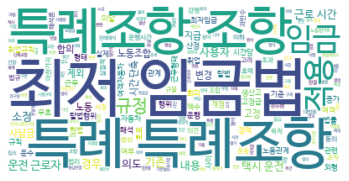

In [35]:
#nouns 안 여러 리스트를 하나의 리스트로 합치기
list=[]
for i in range(len(nouns)):
    list += nouns[i]
    
#WordCloud 출력
print('\n워드 클라우드: ')
wordcloud = WordCloud(
    font_path = 'C:\\Users\\user\\Downloads\\NanumBarunGothic.ttf',
    background_color = 'white',
).generate(' '.join(list))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 단어 빈도수 그래프


단어 빈도수 그래프: 


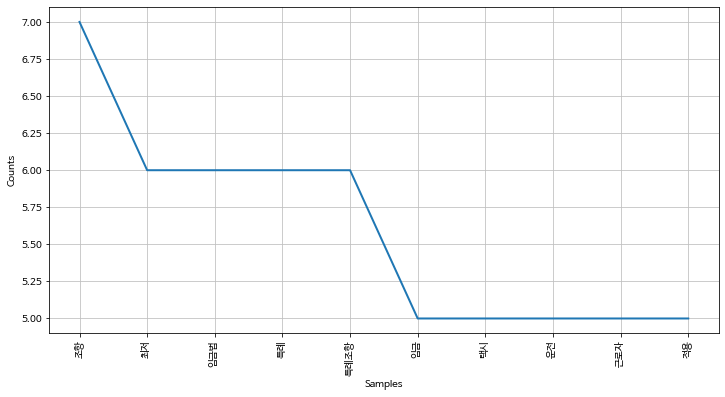

In [36]:
print('\n단어 빈도수 그래프: ')
plt.figure(figsize=(12,6))
font_name = fm.FontProperties(fname='C:\\Users\\user\\Downloads\\NanumBarunGothic.ttf', size=50).get_name()
plt.rc('font', family=font_name)
words = nltk.Text(list, name='단어 빈도수')
words.plot(10) # 10개
plt.show()